# Classification - Support Vector Machine

In [1]:
# Required imports for this task
import numpy as np
import pandas as pd
from pandas import Series, DataFrame

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.feature_selection import chi2
from sklearn.feature_selection import SelectKBest
from sklearn.multiclass import OneVsOneClassifier
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from matplotlib import style
from mlxtend.plotting import plot_decision_regions
import matplotlib.pyplot as plt

#global variables to be used for font style
esc_start_green = '\033[32;1;4m'
esc_start_blue = '\033[34;1m'
esc_start_underline = '\033[34;1;4m'
esc_end = '\033[0m'

In [2]:
# Load wine dataset from sklearn datasets
from sklearn.datasets import load_wine
wine_data = load_wine()

In [3]:
# Create a dataframe object
features = pd.DataFrame(data=wine_data.data,columns=wine_data.feature_names)
wine_df = features

# Append target and class columns to the dataframe object manually
wine_df['target']=wine_data['target']
wine_df['class']=wine_df['target'].map(lambda var: wine_data['target_names'][var])

# Drop class and target in new object for futher analysis
wine_df_data = wine_df.drop(['class','target'],axis=1)

In [4]:
# Split your dataset 70% for training, and 30% for testing the classifier
x_train, x_test, y_train, y_test = train_test_split(wine_df_data,wine_df.target,test_size=0.3)

In [5]:
# Select only 2 attributes for training and testing your model
select = SelectKBest(chi2,k=2)
selected_feature = select.fit(x_train,y_train)
indices_selected = selected_feature.get_support(indices=True)
columns_selected = [wine_df_data.columns[i] for i in indices_selected]
x_train_selected = x_train[columns_selected]
x_test_selected = x_test[columns_selected]


  SVM using Linear Method  

 
 Confusion matrix
  [[14  2  1]
 [ 0 18  2]
 [ 0  2 15]]
 
 Classification Report
               precision    recall  f1-score   support

          0       1.00      0.82      0.90        17
          1       0.82      0.90      0.86        20
          2       0.83      0.88      0.86        17

avg / total       0.88      0.87      0.87        54

 
 Accuracy Score:  87.04 %


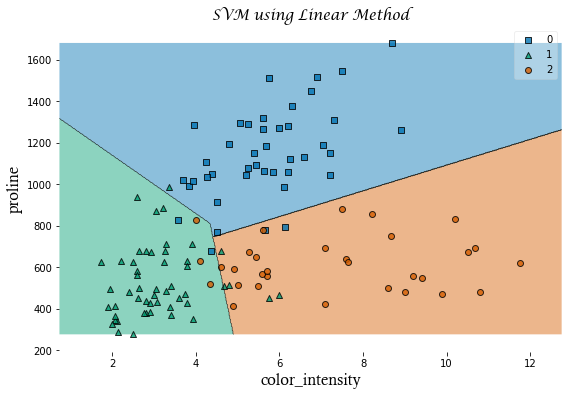

In [6]:
# SVM using Linear
print('\n',esc_start_green,"SVM using Linear Method",esc_end,'\n')

modelLinear = SVC(kernel='linear',decision_function_shape='ovo')
modelLinear.fit(x_train_selected,y_train)

# Predict the output
predictionsLinear = modelLinear.predict(x_test_selected)
# Create Confusion Matrix
cmLinear = confusion_matrix(y_test,predictionsLinear)
# Create Classification Report
crLinear = classification_report(y_test,predictionsLinear)
# Compute Accuracy
acLinear = accuracy_score(y_test, predictionsLinear)

print(esc_start_blue,"\n Confusion matrix\n",esc_end,cmLinear)
print(esc_start_blue,"\n Classification Report\n",esc_end,crLinear)
print(esc_start_blue,"\n Accuracy Score:",esc_end,round((acLinear*100),2),'%')


# Plotting decision regions
plt.figure(figsize=(9,6))
axLinear = plot_decision_regions(x_train_selected.values, y_train.values, clf=modelLinear, colors='#0072b2,#009e73,#d55e00,#cc79a7,#f0e442,#56b4e9')
axLinear.set_xlabel(x_train_selected.columns[0], fontname="Calisto MT", fontsize=16)
axLinear.set_ylabel(x_train_selected.columns[1], fontname="Calisto MT", fontsize=16)
axLinear.set_title("SVM using Linear Method", y=1, fontname='Lucida Calligraphy', fontsize=14)
plt.savefig('LinearSVM.png')
plt.show()


  SVM using Gaussian RBF Method  

 
 Confusion matrix
  [[12  1  4]
 [ 0 13  7]
 [ 1  7  9]]
 
 Classification Report
               precision    recall  f1-score   support

          0       0.92      0.71      0.80        17
          1       0.62      0.65      0.63        20
          2       0.45      0.53      0.49        17

avg / total       0.66      0.63      0.64        54

 
 Accuracy Score:  62.96 %


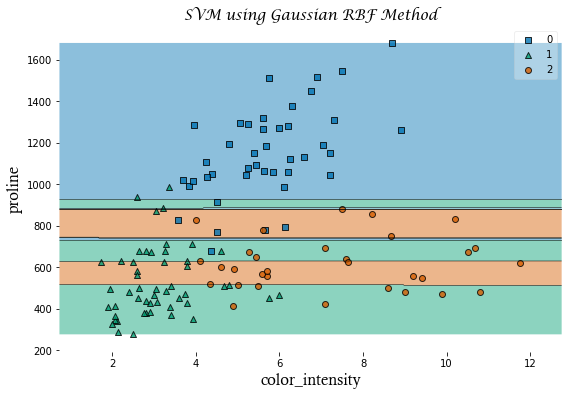

In [7]:
# SVM using Gaussian RBF

print('\n',esc_start_green,"SVM using Gaussian RBF Method",esc_end,'\n')

modelRBF = SVC(gamma=0.0001,decision_function_shape='ovo')
modelRBF.fit(x_train_selected,y_train)

# Predict the output
predictionsRBF = modelRBF.predict(x_test_selected)
# Create Confusion Matrix
cmRBF = confusion_matrix(y_test,predictionsRBF)
# Create Classification Report 
crRBF = classification_report(y_test,predictionsRBF)
# Compute Accuracy
acRBF = accuracy_score(y_test, predictionsRBF)

print(esc_start_blue,"\n Confusion matrix\n",esc_end,cmRBF)
print(esc_start_blue,"\n Classification Report\n",esc_end,crRBF)
print(esc_start_blue,"\n Accuracy Score:",esc_end,round((acRBF*100),2),'%')

# Plotting decision regions
plt.figure(figsize=(9,6))
axRBF = plot_decision_regions(x_train_selected.values, y_train.values, clf=modelRBF,colors='#0072b2,#009e73,#d55e00,#cc79a7,#f0e442,#56b4e9')

# Adding axes annotations
axRBF.set_xlabel(x_train_selected.columns[0], fontname="Calisto MT", fontsize=16)
axRBF.set_ylabel(x_train_selected.columns[1], fontname="Calisto MT", fontsize=16)
axRBF.set_title("SVM using Gaussian RBF Method", y=1, fontname='Lucida Calligraphy', fontsize=14)
plt.savefig('RBFSVM.png')
plt.show()


  SVM using Non Linear Method  

 
 Confusion matrix
  [[16  1  0]
 [ 0 18  2]
 [ 0  2 15]]
 
 Classification Report
               precision    recall  f1-score   support

          0       1.00      0.94      0.97        17
          1       0.86      0.90      0.88        20
          2       0.88      0.88      0.88        17

avg / total       0.91      0.91      0.91        54

 
 Accuracy Score:  90.74 %


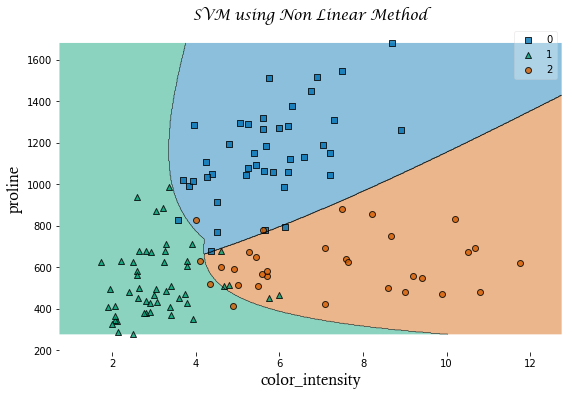

In [8]:
# SVM using polynomial=3

print('\n',esc_start_green,"SVM using Non Linear Method",esc_end,'\n')
modelPoly = SVC(kernel='poly',degree=3, gamma=0.001,decision_function_shape='ovo')
modelPoly.fit(x_train_selected,y_train)

# Predict the output
predictionsPoly = modelPoly.predict(x_test_selected)
# Create Confusion Matrix
cmPoly = confusion_matrix(y_test,predictionsPoly)
# Create Classification Report
crPoly = classification_report(y_test,predictionsPoly)
# Compute Accuracy
acPoly = accuracy_score(y_test, predictionsPoly)

print(esc_start_blue,"\n Confusion matrix\n",esc_end,cmPoly)
print(esc_start_blue,"\n Classification Report\n",esc_end,crPoly)
print(esc_start_blue,"\n Accuracy Score:",esc_end,round((acPoly*100),2),'%')

# Plotting decision regions
plt.figure(figsize=(9,6))
axPloy = plot_decision_regions(x_train_selected.values, y_train.values, clf=modelPoly,colors='#0072b2,#009e73,#d55e00,#cc79a7,#f0e442,#56b4e9')
axPloy.set_xlabel(x_train_selected.columns[0], fontname="Calisto MT", fontsize=16)
axPloy.set_ylabel(x_train_selected.columns[1], fontname="Calisto MT", fontsize=16)
axPloy.set_title("SVM using Non Linear Method", y=1, fontname='Lucida Calligraphy', fontsize=14)

plt.savefig('NonLinearSVM.png')
plt.show()

## <strong>References:</strong>
<b>1. Dataset API related functionalities:</b>
    <p>http://scikit-learn.org/stable/datasets/index.html</p>
    <p>http://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_wine.html#sklearn.datasets.load_wine</p>
    <p>https://jonathonbechtel.com/blog/2018/02/06/wines/</p>
    <p>http://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.SelectKBest.html</p>
    <p>http://scikit-learn.org/stable/modules/feature_selection.html#univariate-feature-selection</p>

<b>2. Font Styles:</b>
    <p>http://ascii-table.com/ansi-escape-sequences.php</p>

<b>3. Graph Plot:</b>
    <p>https://rasbt.github.io/mlxtend/user_guide/plotting/plot_decision_regions/</p>
    <p>http://scikit-learn.org/stable/auto_examples/svm/plot_iris.html</p>
    <p>http://colorbrewer2.org/#type=qualitative&scheme=Set2&n=3</p>

<b>4. Package Installation:</b>
    <p>https://rasbt.github.io/mlxtend/installation/</p>
    <p>https://github.com/rasbt/mlxtend</p>